In [1]:
%run ./Initialization.ipynb
set_plot_style(usetex=False)

2019年  9月 16日 月曜日 16:30:33 JST
3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
Running with PyMC3 version v.3.7
Running with arviz version v.0.4.1
Running with pandas version v.0.25.1
Running with Theano version v.1.0.4


In [2]:
!ls ../../data

 2010pigsdistribution		    baidu.xlsx
'Airports in China'		    by_county
 ASF_data.csv			    China_population
 ASF_data_for_Yang_san_temp.csv     Data.xlsx
 ASF_data_from_MOA.csv		    export-import
 ASF_data_Yang.csv		    Glob_pig-density.kmz
 ASF_livepigs_area.csv		    htmls
 ASF_pdfs			    Importation_livedpigs_SMJ_29Mar2019.xlsx
 ASF_reports_indexing.csv	    ImportExport_livepigs_SMJNML_29Mar2019.xlsx
 ASF_Vietnam_data.csv		    Japan_FMD_2010_data.csv
 ASF_Vietnam_pdfs		    Japan_FMD_2010_data-processed.csv
 ASF_Vietnam_reports_indexing.csv   maps
 ASF_Vietnam_xmls		    Odessa-1977.xlsx
 ASF_xmls			    provinces_of_china.jpeg
 ASF_Yuan_nml.xlsx		    README.md
 ASF_Yuan.xlsx			    shapefiles
 baidu-final.xlsx		    statbook
'Baidu trends'


In [3]:
Df = pd.read_excel("../../data/Odessa-1977.xlsx").set_index('No')
Df[:3]

,Location,Lat,Long,Start,Confirmation,Susceptible,Exposure_source,Exposure_start,Exposure_end,Remarks
No,,,,,,,,,,
1,"Usatovo village, Subsidiary holding",46.536389,30.656667,1977-02-10,1977-04-11,4746,Swill feeding,NaT,NaT,NaN
2,"Il'inka, 'Chapaeva' collective farm",46.683333,30.638056,1977-04-13,1977-04-20,3659,Swill feeding,NaT,NaT,NaN
3,"Naberezhny village, subsidiary holding of a mi...",46.572778,30.696111,1977-04-15,1977-04-20,105,Swill feeding,1977-02-15,1977-04-10,NaN


In [4]:
Date0 = np.min(Df.Start)
Df['Day'] = (Df.Start-Date0).astype('timedelta64[D]').astype('int')
Df['Week'] = (Df.Start-Date0).astype('timedelta64[W]').astype('int')
Df[-5:]

,Location,Lat,Long,Start,Confirmation,Susceptible,Exposure_source,Exposure_start,Exposure_end,Remarks,Day,Week
No,,,,,,,,,,,,
16,"Starokozachye village, ‘XXI Partsyezda’ collec...",46.335000,29.978889,1977-05-20,1977-05-25,11372,Transport vehicle,NaT,NaT,NaN,99,14
17,"Osichki village, ‘Druzhba’ collective farm",48.131111,30.028889,1977-05-27,1977-07-02,1834,Movement of pigs,NaT,NaT,NaN,106,15
18,"Kantseba village, private backyard holding",48.114722,29.970278,1977-05-19,1977-07-08,18,Market sell of pork,NaT,NaT,NaN,98,14
19,"Belousovka village, collective farm named afte...",47.983611,30.022778,1977-05-19,1977-07-29,1509,Movement of pigs,NaT,NaT,NaN,98,14
20,"Nedelkovo village, private backyard holding",48.036389,30.066389,1977-07-02,1977-07-19,3,Market sell of pork,1977-06-23,1977-06-30,Exposure: end of June,142,20


In [5]:
tail_of_zeros = 15

df_epi = Df.groupby('Week').size().reset_index().rename(columns={0: 'n'})
df_epi = pd.DataFrame({'Week': range(np.max(Df['Week'])+tail_of_zeros)}).merge(df_epi,how='left').fillna(0)
df_epi['n'] = df_epi['n'].astype('int')
df_epi

,Week,n
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
5,5,1
6,6,0
7,7,3
8,8,6
9,9,3


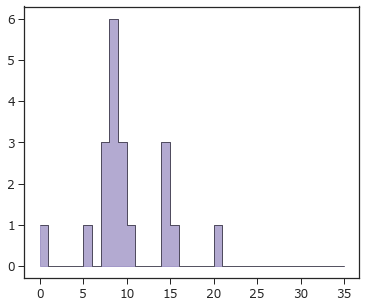

In [6]:
fig, ax = plt.subplots(1)
fig_sz = [6,5]; fig.set_size_inches(fig_sz); 

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.6,color='C4')

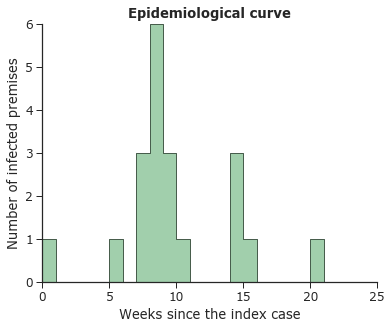

In [14]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,4.75) 

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C2',label='Data');

ax.set_ylim(0,6)
ax.set_xlim(0,len(df_epi)-tail_of_zeros+5)
ax.set_xlabel('Weeks since the index case')
ax.set_ylabel('Number of infected premises')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(frameon=False);
ax.set_title("Epidemiological curve",fontweight="bold");

plt.savefig("../../figures/draft/AppendixFig-Odessa1977-epicurve.pdf",format='pdf',bbox_inches='tight')

In [7]:
X = [tt.exp(pm.Gamma.dist(mu=2,sd=1).logcdf(x)) for x in np.arange(7)]
[x.eval() for x in X]
tt.extra_ops.diff(X).eval()

array([0.14287654, 0.42365334, 0.28226624, 0.10882377, 0.03204406,
       0.00804426])

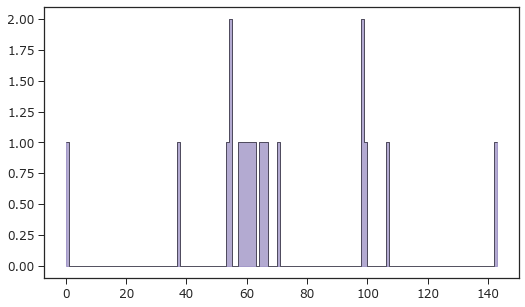

In [9]:
df_epi_daily = Df.groupby('Day').size().reset_index().rename(columns={0: 'n'})
df_epi_daily = pd.DataFrame({'Day': range(np.max(Df['Day'])+1)}).merge(df_epi_daily,how='left').fillna(0)
df_epi_daily['n'] = df_epi_daily['n'].astype('int')

fig, ax = plt.subplots(1)
fig.set_size_inches(8.5,5); 

ax.step(df_epi_daily['Day'].append(df_epi_daily['Day'][-1:]+1), 
        df_epi_daily['n'].append(df_epi_daily['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi_daily['Day'].append(df_epi_daily['Day'][-1:]+1),
                df_epi_daily['n'].append(df_epi_daily['n'][-1:]),
                step='post',alpha=.6,color='C4');

In [10]:
df_ = df_epi.copy()
# df_ = df_epi_daily.copy()

In [11]:
def conv(X, Y):
    conv_ = [0,X[0]*Y[0]]
    for idx in np.arange(1,len(X)-1):
        conv_.append(np.dot(X[idx::-1],Y[:(idx+1)]))
    return(conv_)

X = [1,2,3]
Y = [4,0,6]

conv(X,Y)

[0, 4, 8]

In [4]:
1.98517e+07/3600/24/50

4.595300925925926

# Maximum likelihood estimation

In [12]:
@as_op(itypes=[tt.lscalar,tt.dscalar, tt.dscalar, tt.lscalar], otypes=[tt.dvector, tt.dvector, tt.dvector])
def geninterval_and_convolutions(distr,prm1,prm2,length):
    taus = np.arange(1,length+1)
    if (distr==1): #1 for Gamma
        gtmean = prm1; gtSD = prm2
        gt = gammainc((gtmean/gtSD)**2, gtmean*taus/(gtSD**2))
    elif (distr==2): #2 for Weibull
        gtmean = prm1; k = prm2
        theta = gtmean/ssp.gamma(1+1/k)
        gt = 1-exp(-(taus/theta)**k)
    elif (distr==3): #3 for Lognormal
        μ = prm1; σ = prm2
        gt = 0.5*(1+ssp.erf((np.log(taus)-μ)/sqrt(2.)/σ))
#         gt = np.array([np.exp(pm.Lognormal.dist(μ,σ).logcdf(x).eval()) for x in taus])
    gt = np.append([gt[0]],gt[1:]-gt[:-1])
    # First convolution
    g2t = np.array([0,gt[0]*gt[0]])
    for idx in np.arange(1,length-1):
        g2t = np.append(g2t,[np.dot(gt[idx::-1],gt[:(idx+1)])])
#         print([gt[idx::-1],gt[:(idx+1)]])
    # Second convolution
    g3t = np.array([0,g2t[0]*gt[0]])
    for idx in np.arange(1,length-1):
        g3t = np.append(g3t,[np.dot(g2t[idx::-1],gt[:(idx+1)])])
    return [gt, g2t, g3t]

In [13]:
# example
distr_ = theano.shared(np.dtype('int64').type(3))
gtmean = theano.shared(np.dtype('float64').type(2.0))
gtsd = theano.shared(np.dtype('float64').type(1.0))
τlength = theano.shared(np.dtype('int64').type(7))
res = geninterval_and_convolutions(distr_,gtmean,gtsd,τlength)

[res_.eval() for res_ in res]

[array([0.02275013, 0.07288122, 0.08805976, 0.08601382, 0.07835555,
        0.0694601 , 0.06091121]),
 array([0.        , 0.00051757, 0.00331611, 0.00931841, 0.01674946,
        0.0238573 , 0.02973046]),
 array([0.00000000e+00, 0.00000000e+00, 1.17747518e-05, 1.13163071e-04,
        4.99254592e-04, 1.39672403e-03, 2.90984095e-03])]

In [14]:
def makeModel(distr_,number_of_generations):
    with pm.Model() as model:
        distr = shared(np.dtype('int64').type(distr_))
        numpoints = shared(np.dtype('int64').type(df_.shape[0]))
        N = pm.HalfFlat('N',testval=20)
    
    if(distr_==3):
        with model:
            gtmean = pm.HalfFlat('gtmean',testval=2.)
            gtsd = pm.HalfFlat('gtsd',testval=.3)        
    else:
        with model:
            gtmean = pm.HalfFlat('gtmean',testval=7.)
            gtsd = pm.HalfFlat('gtsd',testval=4.)
        
    with model:
        gt, g2t, g3t = geninterval_and_convolutions(distr,gtmean,gtsd,numpoints)

    if (number_of_generations>2):
        with model:
            R = pm.HalfFlat('R',shape=number_of_generations-2,testval=[.4]*(number_of_generations-2))

    if(number_of_generations==2):
        with model:
            λ = N*gt
    elif(number_of_generations==3):
        with model:
            λ = N*(gt+R[0]*g2t)
    elif(number_of_generations==4):
        with model:
            λ = N*(gt+R[0]*g2t+R[1]*g3t)
    
    with model:
        pm.Poisson('likelihood',λ[1:]+1e-6,observed=df_['n'][1:])
        loglks = tt.switch(tt.eq(λ,0), 0, df_['n'].values*tt.log(λ)-λ-tt.gammaln(df_['n'].values+1))
        loglk = pm.Deterministic('loglk',loglks.sum())
        pm.Deterministic('number_of_generations',shared(np.dtype('int64').type(number_of_generations)))
        pm.Deterministic('distribution',distr)
        pm.Deterministic('AIC',2*(number_of_generations+1-loglk))
        pm.Deterministic('lamb',λ)
        
    model.name = str(number_of_generations)+' generations'
    
    return model

In [15]:
sols = []
for distr_ in [1,2,3]:
    for number_of_generations_ in [2,3,4]:
        modelMLE = makeModel(distr_,number_of_generations_)
        solMLE = pm.find_MAP(model=modelMLE)
        sols.append(solMLE)
        display(solMLE)

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -24.317: 100%|██████████| 120/120 [00:00<00:00, 1070.79it/s] 


{'N_log__': array(2.94443829),
 'gtmean_log__': array(2.34122632),
 'gtsd_log__': array(1.20841657),
 'N': array(18.9999869),
 'gtmean': array(10.39397513),
 'gtsd': array(3.34817884),
 'loglk': array(-37.18924627),
 'number_of_generations': array(2),
 'distribution': array(1),
 'AIC': array(80.37849254),
 'lamb': array([2.55306164e-06, 8.84215721e-04, 1.85222196e-02, 1.18370594e-01,
        3.92771817e-01, 8.64158350e-01, 1.43707761e+00, 1.95210542e+00,
        2.27598873e+00, 2.35507121e+00, 2.21439995e+00, 1.92496678e+00,
        1.56729344e+00, 1.20723410e+00, 8.86696238e-01, 6.24952521e-01,
        4.24856327e-01, 2.79770227e-01, 1.79085641e-01, 1.11767006e-01,
        6.81804923e-02, 4.07421098e-02, 2.38934317e-02, 1.37744350e-02,
        7.81716752e-03, 4.37271487e-03, 2.41358072e-03, 1.31586280e-03,
        7.09219581e-04, 3.78194947e-04, 1.99675528e-04, 1.04444930e-04,
        5.41572236e-05, 2.78523608e-05, 1.42139246e-05])}

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -34.611: 100%|██████████| 191/191 [00:00<00:00, 1258.61it/s] 


{'N_log__': array(2.64138358),
 'gtmean_log__': array(2.09523131),
 'gtsd_log__': array(0.2971036),
 'R_log__': array([-1.03857788]),
 'N': array(14.03260537),
 'gtmean': array(8.1273207),
 'gtsd': array(1.34595473),
 'R': array([0.3539577]),
 'loglk': array(-65.16188381),
 'number_of_generations': array(3),
 'distribution': array(1),
 'AIC': array(138.32376761),
 'lamb': array([5.36994978e-20, 6.61042926e-11, 2.31515756e-06, 1.13643011e-03,
        5.42326397e-02, 5.86355653e-01, 2.23511207e+00, 3.91681165e+00,
        3.76101929e+00, 2.23858850e+00, 9.05218457e-01, 2.79545298e-01,
        1.36212929e-01, 2.62816083e-01, 5.60612981e-01, 8.79942305e-01,
        1.02303393e+00, 9.08974540e-01, 6.34850035e-01, 3.57072387e-01,
        1.65142377e-01, 6.39472679e-02, 2.10612377e-02, 5.98185344e-03,
        1.48304412e-03, 3.24419443e-04, 6.32181532e-05, 1.10677396e-05,
        1.75416970e-06, 2.53429678e-07, 3.35816117e-08, 4.10423888e-09,
        4.65001657e-10, 4.90650454e-11, 4.84186633

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -24.313: 100%|██████████| 217/217 [00:00<00:00, 1309.58it/s]     


{'N_log__': array(2.94416074),
 'gtmean_log__': array(2.34120832),
 'gtsd_log__': array(1.20855087),
 'R_log__': array([-67.71692848, -89.61961438]),
 'N': array(18.9947141),
 'gtmean': array(10.39378804),
 'gtsd': array(3.34862853),
 'R': array([3.89862647e-30, 1.19865998e-39]),
 'loglk': array(-37.18500095),
 'number_of_generations': array(4),
 'distribution': array(1),
 'AIC': array(84.3700019),
 'lamb': array([2.56392639e-06, 8.86403240e-04, 1.85501090e-02, 1.18473736e-01,
        3.92942106e-01, 8.64266494e-01, 1.43694451e+00, 1.95162953e+00,
        2.27520547e+00, 2.35411846e+00, 2.21344159e+00, 1.92413029e+00,
        1.56664429e+00, 1.20678133e+00, 8.86412682e-01, 6.24795950e-01,
        4.24784520e-01, 2.79748779e-01, 1.79090175e-01, 1.11782199e-01,
        6.81978324e-02, 4.07575817e-02, 2.39056552e-02, 1.37833783e-02,
        7.82336119e-03, 4.37682658e-03, 2.41621845e-03, 1.31750718e-03,
        7.10219851e-04, 3.78790517e-04, 2.00023479e-04, 1.04644796e-04,
        5.4270

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -26.302: 100%|██████████| 162/162 [00:00<00:00, 1314.16it/s] 


{'N_log__': array(2.94514306),
 'gtmean_log__': array(2.3399644),
 'gtsd_log__': array(1.0780968),
 'N': array(19.01338233),
 'gtmean': array(10.380867),
 'gtsd': array(2.93908056),
 'loglk': array(-30.58366876),
 'number_of_generations': array(2),
 'distribution': array(2),
 'AIC': array(67.16733753),
 'lamb': array([1.40118311e-02, 9.31843296e-02, 2.43488337e-01, 4.56134484e-01,
        7.17123852e-01, 1.00576468e+00, 1.29508334e+00, 1.55415714e+00,
        1.75222773e+00, 1.86392631e+00, 1.87440142e+00, 1.78286223e+00,
        1.60326101e+00, 1.36158989e+00, 1.09035095e+00, 8.21750283e-01,
        5.81612998e-01, 3.85686435e-01, 2.39036075e-01, 1.38100657e-01,
        7.41767396e-02, 3.69390732e-02, 1.70072159e-02, 7.21893337e-03,
        2.81678432e-03, 1.00742001e-03, 3.29283079e-04, 9.80724913e-05,
        2.65371415e-05, 6.50421202e-06, 1.43968861e-06, 2.86927054e-07,
        5.13329026e-08, 8.21922715e-09, 1.17425884e-09])}

logp = -20.649: 100%|██████████| 197/197 [00:00<00:00, 1276.83it/s] 


{'N_log__': array(2.63581855),
 'gtmean_log__': array(2.09384057),
 'gtsd_log__': array(1.92168934),
 'R_log__': array([-1.01729092]),
 'N': array(13.95473044),
 'gtmean': array(8.11602559),
 'gtsd': array(6.83249115),
 'R': array([0.36157314]),
 'loglk': array(-32.69603908),
 'number_of_generations': array(3),
 'distribution': array(2),
 'AIC': array(73.39207816),
 'lamb': array([5.36835791e-06, 6.06441977e-04, 9.15193244e-03, 5.97909767e-02,
        2.47091169e-01, 7.53267198e-01, 1.78280888e+00, 3.20638162e+00,
        3.99155375e+00, 2.89021181e+00, 9.44534481e-01, 1.40334570e-01,
        1.25974618e-01, 2.67981296e-01, 4.91825599e-01, 7.59783446e-01,
        9.66926477e-01, 9.81236392e-01, 7.59239986e-01, 4.22794276e-01,
        1.57769005e-01, 3.62148435e-02, 4.60465594e-03, 2.89833474e-04,
        7.49606239e-06, 7.37792137e-08, 1.71366292e-10, 1.19960694e-13,
        7.29063012e-18, 1.16039282e-22, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.000000

logp = -20.561: 100%|██████████| 263/263 [00:00<00:00, 1317.18it/s] 


{'N_log__': array(2.63700156),
 'gtmean_log__': array(2.09387729),
 'gtsd_log__': array(1.92203714),
 'R_log__': array([ -1.02181861, -69.98303042]),
 'N': array(13.97124875),
 'gtmean': array(8.11632359),
 'gtsd': array(6.83486785),
 'R': array([3.59939755e-01, 4.04348708e-31]),
 'loglk': array(-32.70006094),
 'number_of_generations': array(4),
 'distribution': array(2),
 'AIC': array(75.40012189),
 'lamb': array([5.34649414e-06, 6.04976780e-04, 9.13908676e-03, 5.97509862e-02,
        2.47069678e-01, 7.53575160e-01, 1.78432875e+00, 3.21035072e+00,
        3.99750956e+00, 2.89436370e+00, 9.45185456e-01, 1.40002925e-01,
        1.25403399e-01, 2.66878197e-01, 4.89986316e-01, 7.57190233e-01,
        9.63875963e-01, 9.78296800e-01, 7.56975833e-01, 4.21450787e-01,
        1.57190603e-01, 3.60500416e-02, 4.57709379e-03, 2.87493497e-04,
        7.41134592e-06, 7.26463324e-08, 1.67593049e-10, 1.16442604e-13,
        6.98576960e-18, 1.09726899e-22, 8.64413094e-32, 2.48291105e-32,
        5.049

logp = -26.553: 100%|██████████| 109/109 [00:00<00:00, 1353.15it/s] 


{'N_log__': array(2.94446671),
 'gtmean_log__': array(0.82790886),
 'gtsd_log__': array(-1.15494251),
 'N': array(19.00052687),
 'gtmean': array(2.28852809),
 'gtsd': array(0.31507565),
 'loglk': array(-49.92398477),
 'number_of_generations': array(2),
 'distribution': array(3),
 'AIC': array(105.84796954),
 'lamb': array([3.58506507e-12, 3.91087682e-06, 1.50645535e-03, 3.82888503e-02,
        2.56005469e-01, 7.95516427e-01, 1.53886016e+00, 2.18589735e+00,
        2.51795740e+00, 2.50429967e+00, 2.24119564e+00, 1.85636449e+00,
        1.45154399e+00, 1.08684451e+00, 7.87450074e-01, 5.56417151e-01,
        3.85732077e-01, 2.63553811e-01, 1.78115066e-01, 1.19398184e-01,
        7.95656638e-02, 5.28025480e-02, 3.49465038e-02, 2.30925129e-02,
        1.52497027e-02, 1.00716946e-02, 6.65674487e-03, 4.40511432e-03,
        2.91988498e-03, 1.93924172e-03, 1.29084162e-03, 8.61357629e-04,
        5.76288138e-04, 3.86635832e-04, 2.60146786e-04])}

logp = -20.93: 100%|██████████| 202/202 [00:00<00:00, 1276.05it/s]  


{'N_log__': array(2.64079355),
 'gtmean_log__': array(0.73346574),
 'gtsd_log__': array(-1.7906701),
 'R_log__': array([-1.03623035]),
 'N': array(14.02432825),
 'gtmean': array(2.08228477),
 'gtsd': array(0.16684833),
 'R': array([0.3547896]),
 'loglk': array(-20.92954581),
 'number_of_generations': array(3),
 'distribution': array(3),
 'AIC': array(49.85909162),
 'lamb': array([0.00000000e+00, 7.78506606e-16, 2.61765684e-08, 2.12259758e-04,
        3.20229536e-02, 5.40231438e-01, 2.32863776e+00, 4.01572293e+00,
        3.66527370e+00, 2.13299068e+00, 8.99647889e-01, 3.10805964e-01,
        1.54339344e-01, 2.73739478e-01, 5.81486451e-01, 9.00555200e-01,
        1.02127054e+00, 8.87492673e-01, 6.15804752e-01, 3.53132900e-01,
        1.72235682e-01, 7.31864471e-02, 2.76456683e-02, 9.44306959e-03,
        2.95914346e-03, 8.61259048e-04, 2.35284603e-04, 6.08806087e-05,
        1.50378396e-05, 3.56989331e-06, 8.19310433e-07, 1.82726551e-07,
        3.97810532e-08, 8.48788972e-09, 1.7811459

logp = -20.933: 100%|██████████| 260/260 [00:00<00:00, 1266.56it/s] 


{'N_log__': array(2.64079571),
 'gtmean_log__': array(0.73346571),
 'gtsd_log__': array(-1.79067239),
 'R_log__': array([ -1.03623114, -64.80696002]),
 'N': array(14.02435853),
 'gtmean': array(2.08228472),
 'gtsd': array(0.16684795),
 'R': array([3.54789318e-01, 7.15640442e-29]),
 'loglk': array(-20.92954581),
 'number_of_generations': array(4),
 'distribution': array(3),
 'AIC': array(51.85909162),
 'lamb': array([0.00000000e+00, 7.78508287e-16, 2.61745292e-08, 2.12251580e-04,
        3.20224051e-02, 5.40228676e-01, 2.32864097e+00, 4.01573933e+00,
        3.66528846e+00, 2.13299482e+00, 8.99646390e-01, 3.10803898e-01,
        1.54337816e-01, 2.73738544e-01, 5.81487056e-01, 9.00557969e-01,
        1.02127421e+00, 8.87495277e-01, 6.15805528e-01, 3.53132449e-01,
        1.72234898e-01, 7.31858278e-02, 2.76453112e-02, 9.44290111e-03,
        2.95907490e-03, 8.61234202e-04, 2.35276409e-04, 6.08781089e-05,
        1.50371250e-05, 3.56969993e-06, 8.19260472e-07, 1.82714139e-07,
        3.97

In [16]:
df_sols = pd.DataFrame(sols).sort_values('AIC')
cols = df_sols.columns
cols = cols[['_log__' not in x for x in cols]]
df_sols = df_sols[cols]
df_sols[:5]

,N,gtmean,gtsd,loglk,number_of_generations,distribution,AIC,lamb,R
7,14.024328250451973,2.0822847658291894,0.16684832720907145,-20.929545808790007,3,3,49.85909161758001,"[0.0, 7.785066064276409e-16, 2.617656841505151...",[0.3547895976618045]
8,14.024358533888034,2.082284719288648,0.16684794523237415,-20.92954580904575,4,3,51.8590916180915,"[0.0, 7.785082874960399e-16, 2.617452919511990...","[0.3547893178203907, 7.156404416408095e-29]"
3,19.013382330506627,10.380866996524162,2.9390805619908917,-30.58366876290245,2,2,67.1673375258049,"[0.01401183113770191, 0.09318432963493589, 0.2...",NaN
4,13.954730436209102,8.116025588347227,6.832491154037694,-32.69603907777881,3,2,73.39207815555763,"[5.368357908933543e-06, 0.000606441976513537, ...",[0.3615731441125116]
5,13.971248746246332,8.116323588543992,6.834867849162338,-32.70006094307979,4,2,75.40012188615958,"[5.346494137015897e-06, 0.0006049767795959716,...","[0.35993975450173726, 4.0434870781176855e-31]"


In [17]:
solMLEbest = df_sols[:1]
solMLEbest.T

,7
N,14.024328250451973
gtmean,2.0822847658291894
gtsd,0.16684832720907145
loglk,-20.929545808790007
number_of_generations,3
distribution,3
AIC,49.85909161758001
lamb,"[0.0, 7.785066064276409e-16, 2.617656841505151..."
R,[0.3547895976618045]


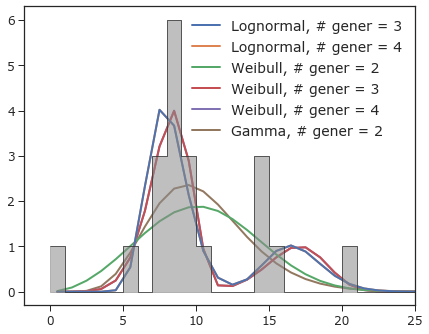

In [18]:
fig, ax = plt.subplots(1)
fig.set_size_inches(7,5.5) 

distribs = ['Gamma','Weibull','Lognormal']
for idx in range(6):
    solMLE_ = df_sols.iloc[idx]
    Y = solMLE_['lamb']
    X = np.arange(.5,len(Y),1)
    ax.plot(X,Y,zorder=-idx,lw=2,
            label='%s, # gener = %d'%(distribs[solMLE_['distribution'].item()-1],solMLE_['number_of_generations'].item()))

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7')
ax.set_xlim(right=len(X)-tail_of_zeros+5)
ax.legend(frameon=False);

# Bayesian approach

## Weibull with maximum two generations

In [131]:
# Weibull with two generations
with pm.Model() as model_weibull:
    numpoints = df_.shape[0]
    N = pm.HalfNormal('N',sd=20)
    gtmean = pm.Uniform('gtmean',0,21)
    k = pm.HalfNormal('k')
    theta = gtmean/tt.gamma(1+1/k)
    pm.Deterministic('gtsd',theta*tt.sqrt(tt.gamma(1+2/k)-(tt.gamma(1+1/k)**2)))
    
    gt = []
    for idx in np.arange(1,numpoints):
        gt.append(np.exp(-((idx-1)/theta)**k)-np.exp(-(idx/theta)**k))
    gt = tt.stack(gt)
    # second convolution
    g2t = [0,gt[0]*gt[0]]
    for idx in np.arange(1,numpoints-2):
        g2t.append(tt.dot(gt[idx::-1],gt[:(idx+1)]))
    g2t = tt.stack(g2t)
    
    R = pm.Uniform('R',0,1)
    
    λ = pm.Deterministic('λ',N*(gt+R*g2t))
    pm.Poisson('likelihood',λ+1e-6,observed=df_['n'][1:])

In [132]:
with model_weibull:
    trace_weibull = pm.sample(4000,tune=2500,init='advi',compute_convergence_checks=False)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 36.539:   3%|▎         | 6885/200000 [00:04<02:01, 1587.34it/s]
Convergence achieved at 7000
Interrupted at 6,999 [3%]: Average Loss = 39.657
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, k, gtmean, N]
Sampling 4 chains, 0 divergences: 100%|██████████| 26000/26000 [00:31<00:00, 835.36draws/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
N,14.447771,4.157549,0.062186,6.949088,22.655682,4837.536439,1.000037
gtmean,7.596750,1.317432,0.018272,5.440047,10.374659,5289.582297,1.000154
gtsd,3.325527,1.113266,0.014208,1.759642,5.252198,5621.256071,1.000204
R,0.397406,0.268600,0.004990,0.000385,0.901139,3166.908145,1.000160


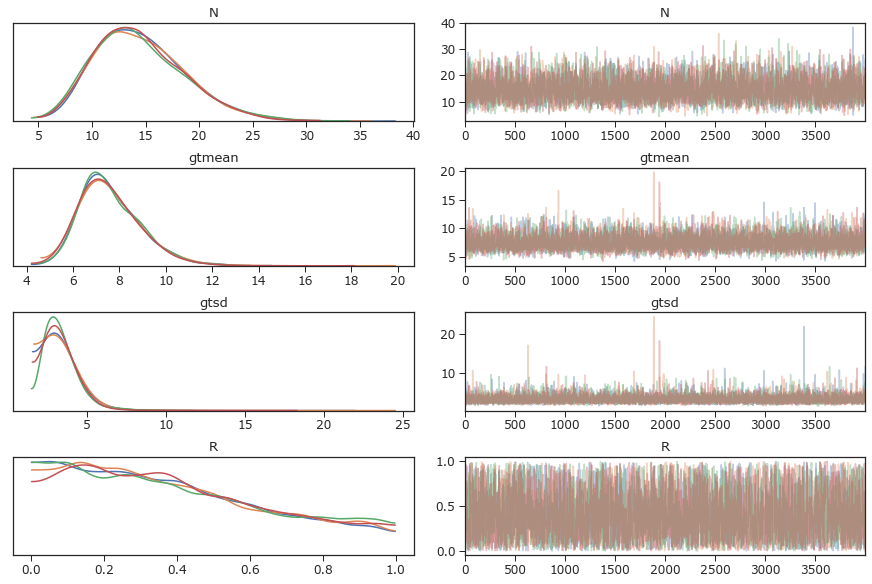

In [133]:
vrnms = ['N','gtmean','gtsd','R']#
pm.traceplot(trace_weibull,var_names=vrnms);
pm.summary(trace_weibull,varnames=vrnms)

In [134]:
df_λ = pm.summary(trace_weibull,varnames=['λ'])
df_λ[:5]

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
λ__0,0.118893,0.178494,0.001872,0.000089,0.430012,8300.265762,0.999914
λ__1,0.365343,0.290715,0.002793,0.009956,0.949357,10344.439240,0.999903
λ__2,0.668934,0.355829,0.003087,0.115300,1.370911,12246.130560,0.999970
λ__3,1.005837,0.395955,0.003151,0.330007,1.793986,14204.300755,1.000073
λ__4,1.336957,0.441353,0.003703,0.538074,2.205419,13946.074508,1.000181


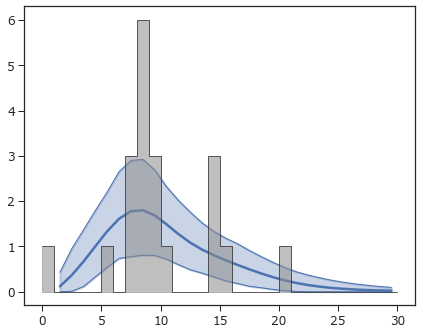

In [135]:
fig, ax = plt.subplots(1)
fig.set_size_inches(7,5.5) 

Y = df_λ['mean'].values
X = np.arange(1.5,len(Y)+1,1)
Y_lower = df_λ['hpd_2.5'].values
Y_upper = df_λ['hpd_97.5'].values
ax.fill_between(X,Y_lower,Y_upper,zorder=-1,lw=2,alpha=.3,color='C0')
ax.plot(X,Y_lower,zorder=-idx,lw=1,color='C0')
ax.plot(X,Y_upper,zorder=-idx,lw=1,color='C0')
ax.plot(X,Y,zorder=0,lw=2.5,color='C0')

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7');

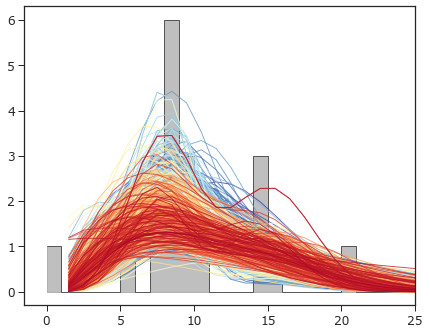

In [137]:
fig, ax = plt.subplots(1)
fig.set_size_inches(7,5.5) 

for idx in range(1000):
    trc = trace_weibull[idx]
    Y = trc['λ']
    X = np.arange(1.5,len(Y)+1,1)
    ax.plot(X,Y,lw=.9,c=plt.cm.RdYlBu(1.-trc['R']/np.max(trace['R'])),alpha=.8,zorder=1+trc['R'])
#     ax.plot(X,Y,lw=.9,c='k',alpha=.5)


ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k',zorder=-1)
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7',zorder=-2);

ax.set_xlim(right=len(df_epi)-tail_of_zeros+5);

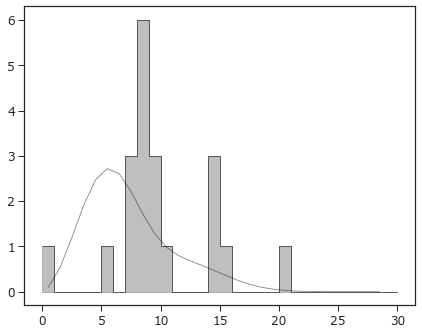

In [138]:
fig, ax = plt.subplots(1)
fig.set_size_inches(7,5.5) 

idx = np.argmax(trace_weibull['R'][:4000])
trc = trace_weibull[idx]
Y = trc['λ']
X = np.arange(.5,len(Y),1)
ax.plot(X,Y,lw=.9,c='k',alpha=.5,zorder=1+trc['R'])


ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7');

In [129]:
trc

{'N_log__': 2.277768494954889,
 'gtmean_interval__': -0.6757290869932001,
 'k_log__': 0.7023310689989666,
 'R_interval__': 0.8721355297633732,
 'N': 9.754888021825298,
 'gtmean': 7.08151902665618,
 'k': 2.0184523794801876,
 'gtsd': 3.671209626288877,
 'R': 0.705189862945299,
 'λ': array([0.14588113, 0.43334487, 0.69211449, 0.90464068, 1.06103367,
        1.15872892, 1.20159866, 1.19816208, 1.15934013, 1.09629577,
        1.01879223, 0.93428888, 0.84776547, 0.76209244, 0.67868441,
        0.59818515, 0.52100674, 0.44764307, 0.37876435, 0.31515404,
        0.25756885, 0.20659318, 0.16253542, 0.12538537, 0.09483036,
        0.07031384, 0.05111603, 0.03643772, 0.02547372])}

## Lognormal with maximum two generations

In [1]:
with pm.Model() as model_lognormal:
    numpoints = df_.shape[0]
    N = pm.HalfNormal('N',sd=100,testval=19)
    μ = pm.Normal('μ',2,sd=100,testval=2)
    σ = pm.Uniform('σ',0,100,testval=.5)
    pm.Deterministic('gtmean',tt.exp(μ+σ**2/2))
    pm.Deterministic('gtsd',tt.sqrt((tt.exp(σ**2)-1)*tt.exp(2*μ+σ**2)))
    
    gt = [0.5*(1+tt.erf((np.log(1)-μ)/(np.sqrt(2.)*σ)))]
    for idx in np.arange(2,numpoints):
        gt.append(0.5*(tt.erf((np.log(idx)-μ)/(np.sqrt(2.)*σ))-tt.erf((np.log(idx-1)-μ)/(np.sqrt(2.)*σ))))
    gt = tt.stack(gt)
    # second convolution
    g2t = [0,gt[0]*gt[0]]
    for idx in np.arange(1,numpoints-2):
        g2t.append(tt.dot(gt[idx::-1],gt[:(idx+1)]))
    g2t = tt.stack(g2t)
    
    R = pm.HalfNormal('R',1)
    
    λ = pm.Deterministic('λ',N*(gt+R*g2t)/(1+R))
    pm.Poisson('likelihood',λ+1e-6,observed=df_['n'][1:])

NameError: name 'pm' is not defined

In [20]:
model_lognormal.check_test_point()

N_log__         -1.90
μ               -5.52
σ_interval__    -5.30
R_log__         -0.77
likelihood     -29.14
Name: Log-probability of test_point, dtype: float64

In [21]:
with model_lognormal:
    trace_lognormal = pm.sample(8000,tune=6000,init='advi',compute_convergence_checks=False)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 41.489:   6%|▌         | 12241/200000 [00:09<02:29, 1258.77it/s]
Convergence achieved at 12300
Interrupted at 12,299 [6%]: Average Loss = 46.789
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, σ, μ, N]
Sampling 4 chains: 100%|██████████| 56000/56000 [01:17<00:00, 722.96draws/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
N,19.951325,4.479948,0.031923,11.762152,28.979069,17258.903441,1.000013
gtmean,7.538694,0.631348,0.006970,6.625197,8.998118,7703.923041,1.000908
gtsd,1.732415,0.691967,0.006878,0.904135,3.088882,7674.557734,1.000337
R,0.429456,0.256778,0.002703,0.002139,0.877498,7962.490509,1.000840


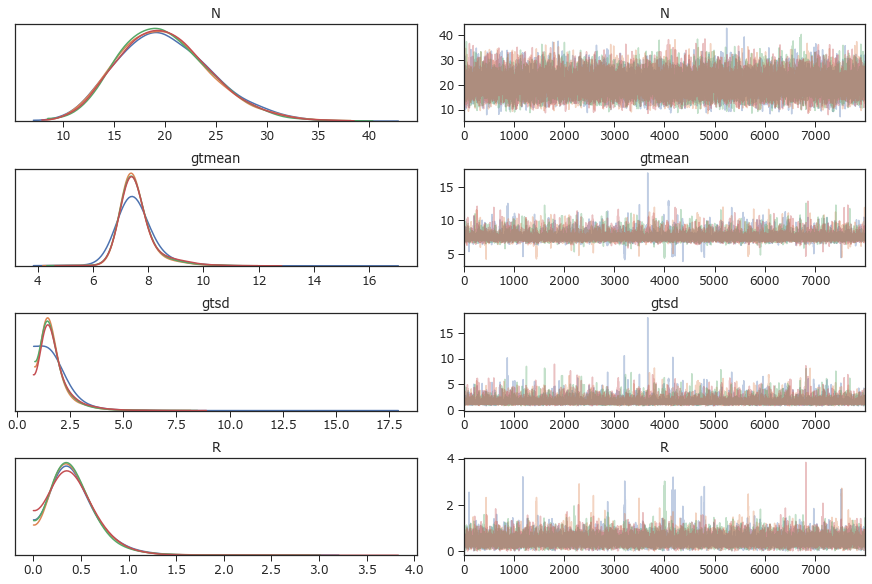

In [22]:
vrnms = ['N','gtmean','gtsd','R']
pm.traceplot(trace_lognormal,var_names=vrnms);
pm.summary(trace_lognormal,varnames=vrnms)

In [23]:
df_λ = pm.summary(trace_lognormal,varnames=['λ'])
df_λ[:5]

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
λ__0,0.000304,0.007482,0.000088,7.036235e-76,6.829805e-08,7310.827249,1.000590
λ__1,0.003879,0.045769,0.000746,1.113283e-152,1.153755e-03,3389.696432,1.001354
λ__2,0.019694,0.110108,0.001740,4.789716e-16,6.571149e-02,3206.308595,1.001001
λ__3,0.110677,0.230054,0.002552,2.785212e-08,5.152750e-01,5758.925781,1.000216
λ__4,0.581266,0.488786,0.003605,3.431670e-03,1.565014e+00,13912.431390,1.000089


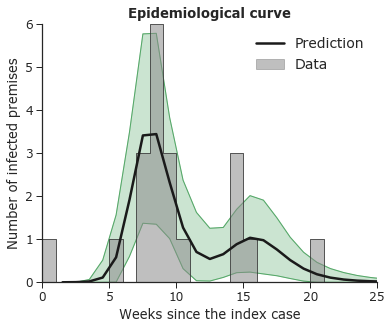

In [24]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,4.75) 

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,alpha=1,color='k')
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7',label='Data');

Y = df_λ['mean'].values
X = np.arange(1.5,len(Y)+1,1)
Y_lower = df_λ['hpd_2.5'].values
Y_upper = df_λ['hpd_97.5'].values
ax.fill_between(X,Y_lower,Y_upper,zorder=-1,alpha=.3,color='C2')
ax.plot(X,Y_lower,zorder=-idx,lw=1,color='C2')
ax.plot(X,Y_upper,zorder=-idx,lw=1,color='C2')
ax.plot(X,Y,zorder=2,lw=2.5,color='k',label='Prediction')

ax.set_ylim(0,6)
ax.set_xlim(0,len(df_epi)-tail_of_zeros+5)
ax.set_xlabel('Weeks since the index case')
ax.set_ylabel('Number of infected premises')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False);
ax.set_title("Epidemiological curve",fontweight="bold");

plt.savefig("../../figures/draft/AppendixFig-Odessa1977e.pdf",format='pdf',bbox_inches='tight')

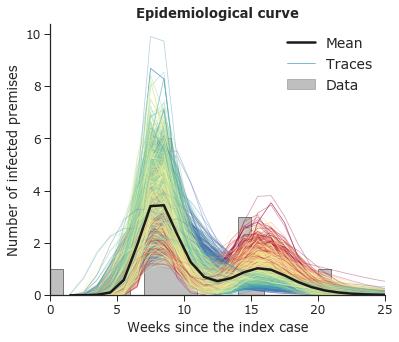

In [25]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,5) 

ax.step(df_epi['Week'].append(df_epi['Week'][-1:]+1), 
        df_epi['n'].append(df_epi['n'][-1:]), 
        where='post',lw=.6,color='k',zorder=1.5,alpha=.6)
ax.fill_between(df_epi['Week'].append(df_epi['Week'][-1:]+1),
                df_epi['n'].append(df_epi['n'][-1:]),
                step='post',alpha=.55,color='C7',zorder=-2,label = 'Data');

ax.plot(X,Y,lw=2.5,zorder=5,c='k',label = 'Mean')

for idx in range(2000):
    trc = trace_lognormal[idx]
    Y_ = trc['λ']
    X_ = np.arange(1.5,len(Y)+1,1)
    if idx:
        ax.plot(X_,Y_,lw=.75,c=plt.cm.Spectral(1.-trc['R']),alpha=.4)
    else:
        ax.plot(X_,Y_,lw=.75,c=plt.cm.Spectral(.9),alpha=.8,label = 'Traces')

ax.set_ylim(bottom=0)
ax.set_xlim(0,len(df_epi)-tail_of_zeros+5)
ax.set_xlabel('Weeks since the index case')
ax.set_ylabel('Number of infected premises')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False);
ax.set_title("Epidemiological curve",fontweight="bold");

plt.savefig("../../figures/draft/AppendixFig-Odessa1977e-with-traces.pdf",format='pdf',bbox_inches='tight')

In [26]:
def discr_lognormal(μ,σ,numpoints):
    gt = [0.5*(1+ssp.erf((np.log(1)-μ)/(np.sqrt(2.)*σ)))]
    for idx in np.arange(2,numpoints):
        gt.append(0.5*(ssp.erf((np.log(idx)-μ)/(np.sqrt(2.)*σ))-ssp.erf((np.log(idx-1)-μ)/(np.sqrt(2.)*σ))))
    return gt

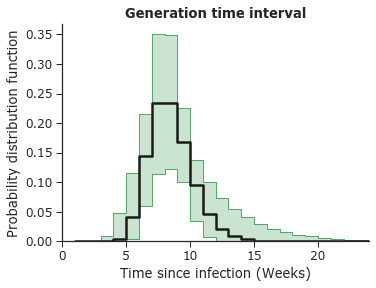

In [27]:
fig, ax = plt.subplots(1)
fig.set_size_inches(5.5,4) 

numpoints_ = 25
xx = np.arange(1,numpoints_)
μ_ = pm.summary(trace_lognormal,varnames='μ')['mean'].item()
σ_ = pm.summary(trace_lognormal,varnames='σ')['mean'].item()
yy = discr_lognormal(μ_,σ_,numpoints_)
ax.step(np.r_[xx,xx[-1:]+1], np.r_[yy,yy[-1:]], 
        where='post',lw=2.5,color='k',zorder=5)

for idx in range(2000):
    trc = trace_lognormal[idx]
    μ_ = trc['μ'].item()
    σ_ = trc['σ'].item()
    yy = [discr_lognormal(μ_,σ_,numpoints_)] if idx==0 else np.r_[yy,[discr_lognormal(μ_,σ_,numpoints_)]]

res_ = ss.scoreatpercentile(yy,[2.5,97.5],axis=0)

ax.step(np.r_[xx,xx[-1:]+1], np.r_[res_[0],res_[0][-1:]], 
        where='post',lw=1,color='C2',zorder=4)
ax.step(np.r_[xx,xx[-1:]+1], np.r_[res_[-1],res_[-1][-1:]], 
        where='post',lw=1,color='C2',zorder=4)
ax.fill_between(np.r_[xx,xx[-1:]+1],np.r_[res_[0],res_[0][-1:]], np.r_[res_[-1],res_[-1][-1:]],
                step='post',alpha=.3,color='C2',label='Data');

ax.set_ylim(bottom=0)
ax.set_xlim(0,np.max(xx))
ax.set_xlabel('Time since infection (Weeks)')
ax.set_ylabel('Probability distribution function')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Generation time interval",fontweight="bold");
# ax.legend(frameon=False);

plt.savefig("../../figures/draft/AppendixFig-Odessa1977f.pdf",format='pdf',bbox_inches='tight')

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


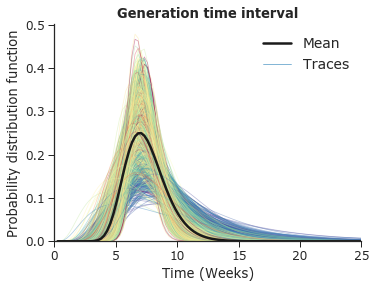

In [28]:
fig, ax = plt.subplots(1)
fig.set_size_inches(5.5,4)  

xx = np.linspace(0,25,100)
yy = tt.exp(pm.Lognormal.dist(pm.summary(trace_lognormal,varnames='μ')['mean'].item(),
                       pm.summary(trace_lognormal,varnames='σ')['mean'].item()).logp(xx)).eval()
ax.plot(xx,yy,lw=2.5,c='k',alpha=1,zorder=5,label='Mean')

for idx in range(2000):
    trc = trace_lognormal[idx]
    μ_ = trc['μ'].item()
    σ_ = trc['σ'].item()
    yy = [1./x/σ_/np.sqrt(2*np.pi)*np.exp(-(np.log(x)-μ_)**2/(2*σ_**2)) for x in xx]
    if idx:
        ax.plot(xx,yy,lw=.75,c=plt.cm.Spectral(1.-trc['R']),alpha=.4)
    else:
        ax.plot(xx,yy,lw=.75,c=plt.cm.Spectral(.9),alpha=.8,label = 'Traces')

ax.set_ylim(bottom=0)
ax.set_xlim(0,np.max(xx))
ax.set_xlabel('Time (Weeks)')
ax.set_ylabel('Probability distribution function')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False);
ax.set_title("Generation time interval",fontweight="bold");

plt.savefig("../../figures/draft/AppendixFig-Odessa1977f-with-traces.pdf",format='pdf',bbox_inches='tight')

In [30]:
# saving trace
import pickle 

with open('trace_Odessa1977.pkl', 'wb') as buff:
    pickle.dump({'model': model_lognormal, 'trace': trace_lognormal}, buff)